# CH5. 그래프에서의 머신러닝 문제(링크예측)

김보람  
2023-04-06

# ref

-   [그래프
    머신러닝](https://product.kyobobook.co.kr/detail/S000200738068)

-   [github](https://github.com/PacktPublishing/Graph-Machine-Learning)

# 그래프에서 누락된 링크 예측

## 유사성 기반 방법

### 지수 기반 방법

-   주어진 두 노드의 이웃을 기반으로 간단한 지수 계싼을 통한 방법

#### 자원 할당 지수

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)
preds = nx.resource_allocation_index(G,[(1,2),(2,5),(3,4)])
print(list(preds))

[(1, 2, 0.5), (2, 5, 0.5), (3, 4, 0.5)]

-   노드 쌍의 지원 할당 지수 목록

-   노드 쌍 사이에 간선이 있을 확률 0.5

`-` 오류나넹.. 아래와 같이 코드 나와야함

``` python


draw_graph(G)
```

![](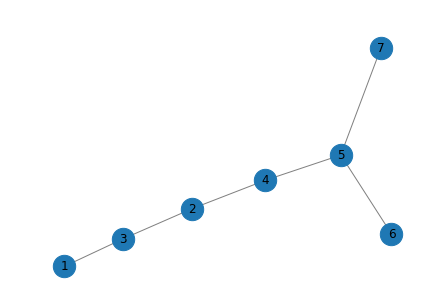.png)

#### 자카드 계수

$$jaccard Coefficient(u,v) = \dfrac{|N(u) \cap N(v)|}{|N(u) \cup N(v)|}$$

-   $N(v)$:노드의 이웃 계산

In [66]:
import networkx as nx
edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)
preds = nx.jaccard_coefficient(G,[(1,2),(2,5),(3,4)])
print(list(preds))
draw_graph(G)

[(1, 2, 0.5), (2, 5, 0.25), (3, 4, 0.3333333333333333)]

`-` 위 함수는 자꾸 오류가 나서 밑에 처럼 바꿔서 진행

[(1, 2, 0.5), (2, 5, 0.25), (3, 4, 0.3333333333333333)]

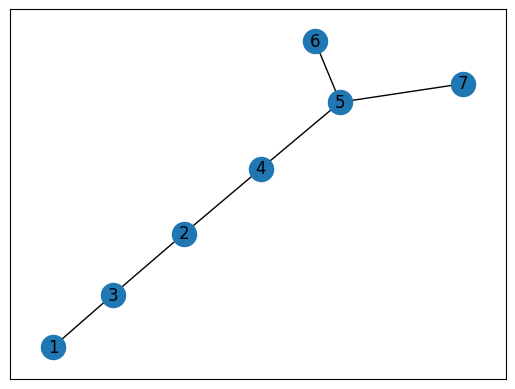

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(G):
    nx.draw_networkx(G, with_labels=True)
    plt.show()

edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)
preds = nx.jaccard_coefficient(G,[(1,2),(2,5),(3,4)])
print(list(preds))
draw_graph(G)


\[(1, 2, 0.5), (2, 5, 0.25), (3, 4, 0.3333333333333333)\]

-   노드 (1,2)사이 간선 확률 0.5, (2,5)사이에 간선 확률 0.25,
    (3,4)사이에 간선 확률 0.3

### 커뮤니티 기반 방법

-   주어진 두 노드가 속한 커뮤니티에 대한 정보를 사용해 지수 계산

#### 커뮤니티 공통 이웃

-   공통 이웃 수를 계산하고 이 값에 동일한 커뮤니티에 속한 공통 이웃
    수를 더한다.

$$Community Common Neighbor(u,v)=|N(v) \cup N(u)| + \sum_{w in N(v) \cap N(u)} f(w)$$

-   w가 u,v와 동일한 커뮤니티에 속하면 $f(w)=1$ 그렇지 않으면 $0$

[(1, 2, 2), (2, 5, 1), (3, 4, 1)]

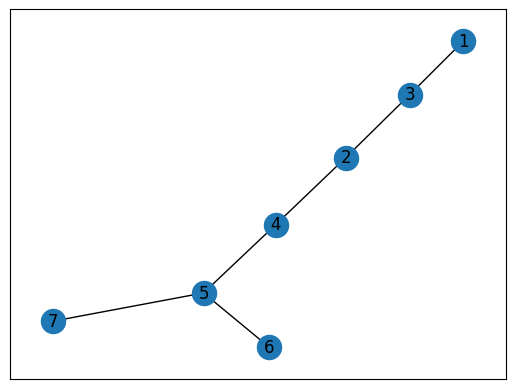

In [67]:
import networkx as nx
edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)


# 1,2,3은 0이라는 커뮤니티
G.nodes[1]["community"] = 0
G.nodes[2]["community"] = 0
G.nodes[3]["community"] = 0



# 4,5,6,7은 1이라는 커뮤니티
G.nodes[4]["community"] = 1
G.nodes[5]["community"] = 1
G.nodes[6]["community"] = 1
G.nodes[7]["community"] = 1


preds = nx.cn_soundarajan_hopcroft(G,[(1,2),(2,5),(3,4)])
print(list(preds))
nx.draw_networkx(G)

In [78]:
nx.degree_pearson_correlation_coefficient?

In [ ]:
nx.draw_networkx

-   결과값 해석.. 어케 함..

#### 커뮤니티 자원 할당

$$Community Common Neighbor(u,v) = \sum_{w in N(v) \cap N(u)} \dfrac{f(w)}{|N(w)|}$$

[(1, 2, 0.5), (2, 5, 0), (3, 4, 0)]

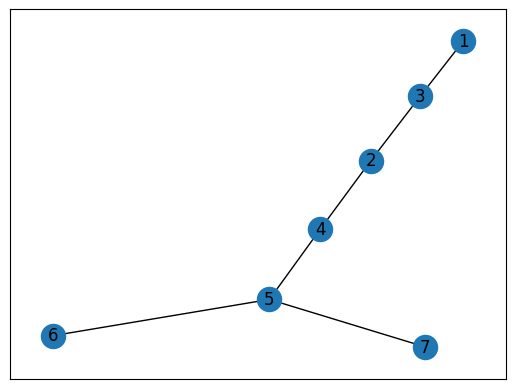

In [13]:
import networkx as nx
edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)

G.nodes[1]["community"] = 0
G.nodes[2]["community"] = 0
G.nodes[3]["community"] = 0

G.nodes[4]["community"] = 1
G.nodes[5]["community"] = 1
G.nodes[6]["community"] = 1
G.nodes[7]["community"] = 1
preds = nx.ra_index_soundarajan_hopcroft(G,[(1,2),(2,5),(3,4)])
print(list(preds))
draw_graph(G)

## 임베딩 기반 방법

-   주어진 그래프에 대한 각 노드 쌍을 특징 벡터(x)로 표현

-   클래스 라벨(y)를 해당 노드 쌍 각각에 할당

`-` 전체 프로세스

`1` 그래프 G의 각 노드에 대해 해당 임베딩 벡터를 node2vec 알고리즘
사용해 계산

`2` 그래프 가능한 모든 노드 쌍에 대해 edge2vec알고리즘 사용해 임베딩
계산

`-` 데이터셋: [cora](https://graphsandnetworks.com/the-cora-dataset/)

1.  인용 데이터셋을 사용해 다음과 같이 networkx 그래프 작성

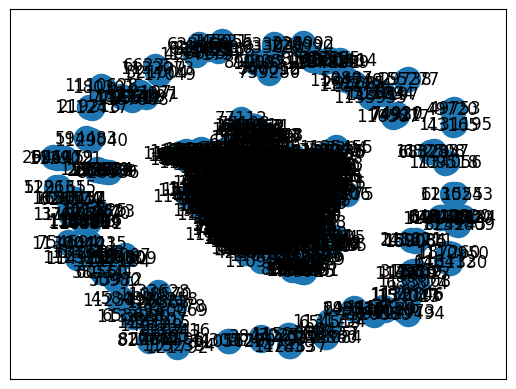

In [18]:
import networkx as nx
import pandas as pd

edgelist = pd.read_csv("cora.cites", sep='\t', header=None, names=["target", "source"])
G = nx.from_pandas_edgelist(edgelist)
draw_graph(G)

1.  그래프 G에서 훈련 및 테스트 데이터셋 생성

-   훈련 및 테스트 데이터셋에서 그래프 G의 실제 노드 쌍을 나타내는 집합+
    G 실제 노드를 나타내지 않는 노드 쌍도 포함

-   양의 인스턴스(클래스 라벨1) : 실제 간선 나타내느 ㄴ쌍

-   음의 인스턴스(클래스 라벨0) : 실제 간선을 나타내지 않는 쌍

In [19]:
from stellargraph.data import EdgeSplitter

edgeSplitter = EdgeSplitter(G)
graph_test, samples_test, labels_test = edgeSplitter.train_test_split(
    p=0.1, method="global"
)

2023-04-06 22:36:33.732989: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

** Sampled 527 positive and 527 negative edges. **

-   `graph_test` 모든 노드 포함, 간선의 부분 집합만 포함하는 원본
    그래프의 부분 집합

-   `sample_test` 각각의 노드 쌍 포함, 실제 간선을 나태나는 노드쌍과
    실제 모서리를 나타내지 않는 노드 쌍이 포함

-   `label_test` sample_test와 같은 길이의 벡터. 0(샘플테스트 백터에서
    음의인스터스를 나타내는 위치)또는 1(양의 인스턴스 위치)만 포함

1.  훈련 세트 생성

In [20]:
edgeSplitter = EdgeSplitter(graph_test, G)
graph_train, samples_train, labels_train = edgeSplitter.train_test_split(
    p=0.1, method="global"
)

** Sampled 475 positive and 475 negative edges. **

1.  훈련 세트 특징 벡터 생성

In [22]:
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder

node2vec = Node2Vec(graph_train)  # 각 노드에 대한 임베딩 생성
model = node2vec.fit()
edges_embs = HadamardEmbedder(keyed_vectors=model.wv) #훈련세트에 포함된 각 노드 쌍의 임베딩 생성 -> 모델 학습 위한 특징 벡터로 사용
train_embeddings = [edges_embs[str(x[0]),str(x[1])] for x in samples_train]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

1.  테스트 세트 특징 벡터 생성

In [23]:
test_embeddings = [edges_embs[str(x[0]),str(x[1])] for x in samples_test]

1.  train_embedding특징 공간과 train_labels 라벨 할당을 이용해 머신러닝
    알고리즘 학습

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(train_embeddings, labels_train);

In [25]:
from sklearn import metrics

y_pred = rf.predict(test_embeddings)

print('Precision:', metrics.precision_score(labels_test, y_pred))
print('Recall:', metrics.recall_score(labels_test, y_pred))
print('F1-Score:', metrics.f1_score(labels_test, y_pred))

Precision: 0.8952380952380953
Recall: 0.713472485768501
F1-Score: 0.7940865892291447